In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt, dates
from pandas.api.types import is_numeric_dtype

Imports necessary libraries for data manipulation, analysis, and visualization, including pandas, numpy, datetime, seaborn, matplotlib, and is_numeric_dtype from the pandas.api.types module.


# **1. Explainatory Data Analysis**

## **1.1. Ingestion**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounting Google Drive in Colab

In [ ]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_02_fuel_leak_signals_preprocessed.csv'
msn02 = pd.read_csv(file_path1, delimiter=';')

file_path2 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_10_fuel_leak_signals_preprocessed.csv'
msn10 = pd.read_csv(file_path2, delimiter=';')

file_path3 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_11_fuel_leak_signals_preprocessed.csv'
msn11 = pd.read_csv(file_path3, delimiter=';')

file_path4 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_12_fuel_leak_signals_preprocessed.csv'
msn12 = pd.read_csv(file_path4, delimiter=';')

file_path5 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_14_fuel_leak_signals_preprocessed.csv'
msn14 = pd.read_csv(file_path5, delimiter=';')

file_path6 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_29_fuel_leak_signals_preprocessed.csv'
msn29 = pd.read_csv(file_path6, delimiter=';')

file_path7 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_37_fuel_leak_signals_preprocessed.csv'
msn37 = pd.read_csv(file_path7, delimiter=';')

file_path8 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_53_fuel_leak_signals_preprocessed.csv'
msn53 = pd.read_csv(file_path8, delimiter=';')

Reading multiple preprocessed CSV files into separate Pandas DataFrames. Each file corresponds to fuel leak signals from different aircraft with identifiers 'msn_02', 'msn_10', 'msn_11', 'msn_12', 'msn_14', 'msn_29', 'msn_37', and 'msn_53'.

In [ ]:
datasets = [msn02, msn10, msn11, msn12, msn14, msn29, msn37, msn53]
dataset_labels = ['msn02', 'msn10', 'msn11', 'msn12', 'msn14', 'msn29', 'msn37', 'msn53']

Creating a list of datasets and their corresponding labels

In [ ]:
datasets_dict = dict(zip(dataset_labels, datasets))

Creating a dictionary mapping dataset labels to their respective DataFrames

## **1.2. Null statistics per file**

In [ ]:
def null_stats(df):
    null_counts = df.isnull().sum()
    null_percentage = (df.isnull().sum() / len(df) * 100).round(2)
    null_info_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
    print(null_info_df)

defines a function named null_stats that takes a Pandas DataFrame as input and displays statistics about null values in each column. It calculates the number of null values and the percentage of null values per column, combining both counts and percentages into a single DataFrame for clearer presentation.

In [ ]:
for file, df in datasets_dict.items():
    print(f'Null stats for file {file}')
    null_stats(df)

Null stats for file msn02
                              Null Count  Null Percentage
UTC_TIME                               0             0.00
MSN                                    0             0.00
Flight                                 0             0.00
ENGINE_RUNNING_1                       0             0.00
ENGINE_RUNNING_2                       0             0.00
...                                  ...              ...
STATUS_FUEL_QTY_UNUSABLE_RST       63293            10.15
STATUS_OVERFLOW_LST                63293            10.15
STATUS_OVERFLOW_RST                63293            10.15
VALUE_FUEL_VOL_LST                 63265            10.15
VALUE_FUEL_VOL_RST                 63275            10.15

[111 rows x 2 columns]
Null stats for file msn10
                    Null Count  Null Percentage
UTC_TIME                     0             0.00
FUEL_USED_2             562272            90.45
FUEL_USED_3             560674            90.20
FUEL_USED_4             565835      

This code iterates through the datasets_dict dictionary, printing the null statistics for each DataFrame in the datasets. The function null_stats is called for each DataFrame, providing information about the number and percentage of null values in each column. The output is displayed in the console for each dataset labeled by 'msn02', 'msn10', 'msn11', ..., 'msn53'.

## **1.3. Calculating the number of null values per flight phase**

In [ ]:
def stats_per_flight_phase(df):
    df_nulls = df.isnull()
    df_nulls['FLIGHT_PHASE_COUNT'] = df['FLIGHT_PHASE_COUNT']
    df_melted = df_nulls.melt(id_vars=['FLIGHT_PHASE_COUNT'], var_name='Column', value_name='IsNull')
    pivot_table_nulls = pd.pivot_table(df_melted, values='IsNull', index='FLIGHT_PHASE_COUNT', columns='Column', aggfunc='sum')
    pivot_table_nulls = pivot_table_nulls.astype(int)
    return pivot_table_nulls

Defines a function named stats_per_flight_phase that takes a Pandas DataFrame as input and generates statistics on null values per flight phase for each column. It creates a pivot table showing the count of null values for each flight phase and each column. The resulting pivot table is returned as a Pandas DataFrame.

In [ ]:
stats_per_flight_phase(msn10)

Column,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,Flight,MSN,UTC_TIME,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT
FLIGHT_PHASE_COUNT,,,,,,,,,,,,,,,,
0.0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0
1.0,427,427,427,408,21,0,0,0,21,21,21,21,21,21,21,21
2.0,61299,60085,60224,59982,552,0,0,0,552,552,552,552,552,552,552,552
3.0,628,628,628,628,0,0,0,0,0,0,0,0,0,0,0,0
4.0,233,233,233,233,0,0,0,0,0,0,0,0,0,0,0,0
5.0,446,446,446,446,0,0,0,0,0,0,0,0,0,0,0,0
6.0,1117,1117,1117,1117,0,0,0,0,0,0,0,0,0,0,0,0
7.0,4517,4517,4517,4517,0,0,0,0,0,0,0,0,0,0,0,0
8.0,425238,425238,425238,425238,0,0,0,0,0,0,0,0,0,0,0,0


Generating statistics on null values per flight phase for 'msn10'

## **1.4. Calculating the duration of each flight**

In [ ]:
df = msn02.copy()
df['UTC_TIME'] = pd.to_datetime(df['UTC_TIME'])
flight_durations = df.groupby('Flight')['UTC_TIME'].agg([min, max]).reset_index()
flight_durations['Duration'] = flight_durations['max'] - flight_durations['min']
flight_durations['Duration_Minutes'] = flight_durations['Duration'].dt.total_seconds() / 60
flight_durations_sorted = flight_durations.sort_values(by='Duration', ascending=False)
print(flight_durations_sorted[['Flight', 'Duration', 'Duration_Minutes']])

   Flight        Duration  Duration_Minutes
31  V0890 0 days 13:05:36        785.600000
10  V0137 0 days 07:46:15        466.250000
8   V0135 0 days 07:38:58        458.966667
36  V0929 0 days 07:27:31        447.516667
2   V0097 0 days 06:09:25        369.416667
40  V0965 0 days 05:47:06        347.100000
1   V0095 0 days 05:23:49        323.816667
38  V0963 0 days 05:21:30        321.500000
27  V0837 0 days 05:14:50        314.833333
41  V0966 0 days 04:57:40        297.666667
4   V0099 0 days 04:49:34        289.566667
9   V0136 0 days 04:42:13        282.216667
37  V0962 0 days 04:28:20        268.333333
21  V0625 0 days 04:18:00        258.000000
22  V0626 0 days 04:12:58        252.966667
3   V0098 0 days 04:11:04        251.066667
19  V0623 0 days 04:07:51        247.850000
14  V0345 0 days 04:05:03        245.050000
6   V0133 0 days 03:58:42        238.700000
32  V0925 0 days 03:48:01        228.016667
12  V0140 0 days 03:45:06        225.100000
30  V0889 0 days 03:44:33       

This code snippet creates a new DataFrame df based on the 'msn_02' dataset, converts the 'UTC_TIME' column to datetime format, and calculates the duration of each flight. The resulting DataFrame, flight_durations_sorted, is then sorted by duration in descending order. The printed output includes the Flight, Duration, and Duration in Minutes columns, providing insights into the duration of each flight in the 'msn_02' dataset.

In [ ]:
average_duration_hours = flight_durations['Duration_Minutes'].mean()
print(f"Average Flight Duration: {average_duration_hours} hours")

Average Flight Duration: 242.0888888888889 hours


Calculating and printing the average flight duration in hours

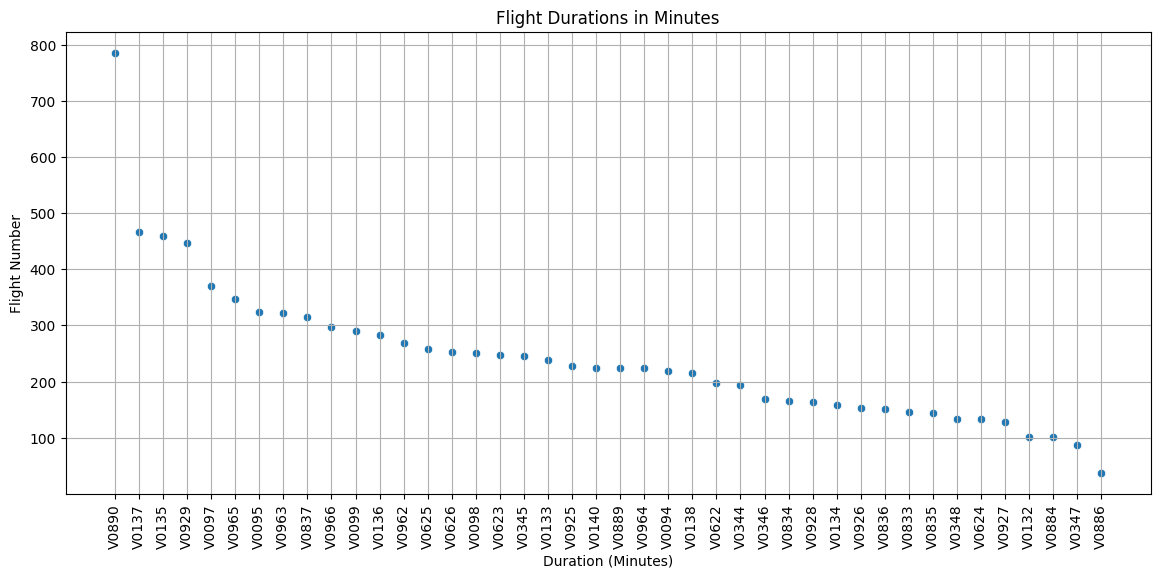

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Flight', y='Duration_Minutes', data=flight_durations_sorted, marker='o')
plt.title('Flight Durations in Minutes')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Flight Number')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Creating a scatter plot for flight durations

## **1.5. Checking for time gaps in every flight**

In [ ]:
for flight_number in df['Flight'].unique():
    df['UTC_TIME'] = pd.to_datetime(df['UTC_TIME'])
    specific_flight_df = df[df['Flight'] == flight_number]
    specific_flight_df = specific_flight_df.sort_values(by='UTC_TIME')
    specific_flight_df['TIME_DIFF'] = specific_flight_df['UTC_TIME'].diff()
    gaps = specific_flight_df[specific_flight_df['TIME_DIFF'] > pd.Timedelta(seconds=1)]
    if not gaps.empty:
        print(f"Gaps found in data for flight {flight_number}:")
        print(gaps[['UTC_TIME', 'TIME_DIFF']])

Checking for time gaps in data for each flight in 'msn02'

## **1.6. Checking for the avergae duration of each flight phase across all the flights**

In [ ]:
phase_durations = df.groupby(['Flight', 'FLIGHT_PHASE_COUNT'])['UTC_TIME'].agg([min, max])
phase_durations['PHASE_DURATION'] = phase_durations['max'] - phase_durations['min']
phase_durations.reset_index(inplace=True)
phase_durations['DURATION_SECONDS'] = phase_durations['PHASE_DURATION'].dt.total_seconds()
average_phase_duration_seconds = phase_durations.groupby('FLIGHT_PHASE_COUNT')['DURATION_SECONDS'].mean()
print("Average duration of each flight phase (in seconds):")
print(average_phase_duration_seconds)

Average duration of each flight phase (in seconds):
FLIGHT_PHASE_COUNT
1.0     8491.142857
2.0     2304.523810
3.0      960.928571
4.0      944.238095
5.0      832.571429
6.0     1467.904762
7.0     1584.833333
8.0     9718.357143
9.0     1784.071429
10.0    1052.880952
11.0    1323.404762
12.0     235.547619
Name: DURATION_SECONDS, dtype: float64


Calculating and printing the average duration of each flight phase in seconds

## **1.7. Analyzing the null values for Fuel Used and FOB columns on each file**

In [ ]:
situation_counts = {'Dataset': [], 'FUEL_USED with nulls': [], 'FOB with nulls': [], 'No null values': []}
for df, label in zip(datasets, dataset_labels):
    condition1 = (df[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].isnull().any(axis=1)) & df['VALUE_FOB'].notnull()
    count_situation1 = df[condition1].shape[0]
    condition2 = (df[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].notnull().all(axis=1)) & df['VALUE_FOB'].isnull()
    count_situation2 = df[condition2].shape[0]
    condition3 = (df[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4', 'VALUE_FOB']].notnull().all(axis=1))
    count_situation3 = df[condition3].shape[0]
    situation_counts['Dataset'].append(label)
    situation_counts['FUEL_USED with nulls'].append(count_situation1)
    situation_counts['FOB with nulls'].append(count_situation2)
    situation_counts['No null values'].append(count_situation3)
situation_counts_df = pd.DataFrame(situation_counts)
print(situation_counts_df)

  Dataset  FUEL_USED with nulls  FOB with nulls  No null values
0   msn02                 45659               4          514663
1   msn10                538649           29670              24
2   msn11               4059234          136220           96431
3   msn12               3116948           30490           90546
4   msn14               4371574           62154          203932
5   msn29               3759784          138784           50138
6   msn37               2920022           72611          243494
7   msn53               2767387           46209          219761


Counting situations based on null values in 'FUEL_USED' and 'VALUE_FOB' columns

## **1.8. Checking for number of records and duration for flight phase 8**

In [ ]:
df = msn02.copy()
df = df[df['FLIGHT_PHASE_COUNT'] == 8]
df['UTC_TIME'] = pd.to_datetime(df['UTC_TIME'])
flight_duration = df.groupby('Flight')['UTC_TIME'].agg([min, max])
flight_duration['Duration'] = flight_duration['max'] - flight_duration['min']
flight_duration['Duration'] = flight_duration['Duration'].dt.total_seconds() / 60
total_rows_per_flight = df.groupby('Flight').size()
rows_per_flight_and_phase = df.groupby(['Flight', 'FLIGHT_PHASE_COUNT']).size()
total_rows_per_flight_df = total_rows_per_flight.reset_index(name='Total Rows')
rows_per_flight_and_phase_df = rows_per_flight_and_phase.reset_index(name='Rows per Phase')
total_rows_and_duration_df = total_rows_per_flight_df.merge(
    flight_duration['Duration'], left_on='Flight', right_index=True
)
total_rows_and_duration_sorted = total_rows_and_duration_df.sort_values(by='Total Rows', ascending=False)
print("Total Rows and Duration per Flight (Sorted):")
print(total_rows_and_duration_sorted.head(100))

Total Rows and Duration per Flight (Sorted):
   Flight  Total Rows    Duration
30  V0889       18282  156.316667
40  V0965       17193  286.533333
8   V0135       16903  281.700000
38  V0963       16356  274.150000
41  V0966       16107  268.433333
10  V0137       16003  266.700000
36  V0929       15727  262.100000
1   V0095       15090  251.483333
2   V0097       14591  243.166667
9   V0136       14049  234.133333
27  V0837       14038  233.950000
4   V0099       13950  232.483333
21  V0625       12200  205.650000
39  V0964       11630  194.166667
6   V0133       11508  191.783333
19  V0623       11457  190.933333
3   V0098       11374  189.550000
32  V0925       10937  182.316667
37  V0962       10552  177.950000
0   V0094       10335  172.233333
12  V0140        9732  162.183333
18  V0622        8884  148.050000
13  V0344        8658  144.283333
24  V0834        8300  138.316667
35  V0928        7442  124.016667
25  V0835        7081  118.000000
7   V0134        6992  116.516667
14 

<ipython-input-16-41cc3f3027bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UTC_TIME'] = pd.to_datetime(df['UTC_TIME'])


This code analyzes the total rows and duration per flight for data with FLIGHT_PHASE_COUNT equal to 8 in the 'msn_02' dataset. It calculates the minimum and maximum UTC_TIME for each flight, computes the duration in minutes, and then determines the total rows per flight and rows per flight and phase. The results are presented in a sorted DataFrame, displaying the top 100 rows with the highest total count.

In [ ]:
phase_8_df = df[df['FLIGHT_PHASE_COUNT'] == 8]
fuel_used_columns = ['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']
def null_time_frame(group):
    nulls = group[fuel_used_columns].isnull().any(axis=1)
    if nulls.any():
        min_time = group.loc[nulls, 'UTC_TIME'].min()
        max_time = group.loc[nulls, 'UTC_TIME'].max()
        return pd.Series({'Start_Null_Time': min_time, 'End_Null_Time': max_time})
    else:
        return pd.Series({'Start_Null_Time': None, 'End_Null_Time': None})
null_time_frames = phase_8_df.groupby('Flight').apply(null_time_frame).reset_index()
null_time_frames['Start_Null_Time'] = pd.to_datetime(null_time_frames['Start_Null_Time'])
null_time_frames['End_Null_Time'] = pd.to_datetime(null_time_frames['End_Null_Time'])
null_time_frames['Null_Duration_Seconds'] = (null_time_frames['End_Null_Time'] - null_time_frames['Start_Null_Time']).dt.total_seconds()
print(null_time_frames)

   Flight Start_Null_Time End_Null_Time  Null_Duration_Seconds
0   V0094             NaT           NaT                    NaN
1   V0095             NaT           NaT                    NaN
2   V0097             NaT           NaT                    NaN
3   V0098             NaT           NaT                    NaN
4   V0099             NaT           NaT                    NaN
5   V0132             NaT           NaT                    NaN
6   V0133             NaT           NaT                    NaN
7   V0134             NaT           NaT                    NaN
8   V0135             NaT           NaT                    NaN
9   V0136             NaT           NaT                    NaN
10  V0137             NaT           NaT                    NaN
11  V0138             NaT           NaT                    NaN
12  V0140             NaT           NaT                    NaN
13  V0344             NaT           NaT                    NaN
14  V0345             NaT           NaT                

This code analyzes null time frames for data with FLIGHT_PHASE_COUNT equal to 8 in the 'msn_02' dataset. It defines a function null_time_frame to identify start and end times of null values in the 'FUEL_USED' columns for each flight. The results are then displayed, providing information about the start time, end time, and duration of null values for each flight during phase 8.

## **1.9. Cleaning and filtering the data (flight_phase = 8 & flight duration > 1 hour)**

In [ ]:
def filter_flights_by_phase_and_duration(df, phase=8, duration_threshold=50):
    """
    Filters flights that are in a specific flight phase and exceed a specified duration threshold.
    :param df: DataFrame containing flight data.
    :param phase: The flight phase to focus on.
    :param duration_threshold: The duration threshold in minutes for filtering flights.
    :return: DataFrame containing only the flights that meet the duration threshold within the specified phase.
    """
    df['UTC_TIME'] = pd.to_datetime(df['UTC_TIME'], errors='ignore')
    phase_df = df[df['FLIGHT_PHASE_COUNT'] == phase]
    flight_durations = phase_df.groupby('Flight')['UTC_TIME'].agg(['min', 'max'])
    flight_durations['Duration'] = (flight_durations['max'] - flight_durations['min']).dt.total_seconds() / 60
    flights_meeting_threshold = flight_durations[flight_durations['Duration'] > duration_threshold].index
    filtered_df = phase_df[phase_df['Flight'].isin(flights_meeting_threshold)]
    return filtered_df, flights_meeting_threshold

This function takes a DataFrame containing flight data, filters flights that are in a specific flight phase (phase) and exceed a specified duration threshold (duration_threshold). It returns a filtered DataFrame containing only the flights that meet the duration threshold within the specified phase and a list of flight indices that meet the criteria.

In [ ]:
df_filtered_by_flights, flights_list = filter_flights_by_phase_and_duration (df)

This code applies the filter_flights_by_phase_and_duration function to the 'msn_02' dataset, filtering flights that are in phase 8 and exceed a duration threshold of 50 minutes. The resulting filtered DataFrame (df_filtered_by_flights) and the list of selected flights (flights_list) are then printed to the console for examination.

## **1.10. Ploting the FOB and Altitud for each flight**

In [ ]:
def clean_flight_phases(df):
    df = df.sort_values(by=['UTC_TIME', 'FLIGHT_PHASE_COUNT'], ascending=[True, False])
    phase_8_mask = df['FLIGHT_PHASE_COUNT'] == 8
    df_cleaned = df.drop_duplicates(subset=['UTC_TIME'], keep='last')
    times_with_phase_8 = df[phase_8_mask]['UTC_TIME']
    df_cleaned = df_cleaned[~df_cleaned['UTC_TIME'].isin(times_with_phase_8)]
    df_cleaned = pd.concat([df_cleaned, df[phase_8_mask]], ignore_index=True)
    last_phases = df_cleaned.groupby('Flight')['FLIGHT_PHASE_COUNT'].max()
    def filter_post_final_phase(group):
        last_phase = last_phases[group.name]
        last_phase_time = group[group['FLIGHT_PHASE_COUNT'] == last_phase]['UTC_TIME'].max()
        return group[group['UTC_TIME'] <= last_phase_time]
    df_cleaned = df_cleaned.groupby('Flight',group_keys=True).apply(filter_post_final_phase).reset_index(drop=True)
    df_cleaned = df_cleaned.sort_values(by=['Flight', 'UTC_TIME'])
    return df_cleaned

This function cleans flight phases in the 'msn_02' dataset by sorting the DataFrame, dropping duplicates based on UTC_TIME, and handling FLIGHT_PHASE_COUNT equal to 8. It ensures that only the last occurrence of each timestamp is kept, removes rows with times that have FLIGHT_PHASE_COUNT equal to 8, and filters out rows occurring after the final phase for each flight. The resulting DataFrame is sorted by Flight and UTC_TIME.

In [ ]:
df_cleaned = clean_flight_phases(df_filtered_by_flights)

Cleaning the DataFrame to avoid duplicate records for the same time frame in 'msn02'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_value_fob_and_altitude_by_flight_phase_per_minute(flight_number, df):
    df_flight = df[df['Flight'] == flight_number]
    df_flight = clean_flight_phases(df_flight)
    df_flight['MINUTE'] = df_flight['UTC_TIME'].dt.strftime('%H:%M')
    unique_minutes = df_flight['MINUTE'].unique()
    unique_minutes_sorted = sorted(unique_minutes)
    n = 5
    x_labels = unique_minutes_sorted[::n]
    sns.set(style="darkgrid")
    fig, ax1 = plt.subplots(figsize=(14, 7))
    color_palette = sns.color_palette('tab10', n_colors=df_flight['FLIGHT_PHASE_COUNT'].nunique())
    sns.lineplot(x='MINUTE', y='VALUE_FOB', hue='FLIGHT_PHASE_COUNT', data=df_flight, palette=color_palette, ax=ax1)
    ax2 = ax1.twinx()
    sns.lineplot(x='MINUTE', y='FW_GEO_ALTITUDE', data=df_flight, ax=ax2, color='green', label='FW_GEO_ALTITUDE')
    ax1.set_title(f'Flight {flight_number} - VALUE_FOB and FW_GEO_ALTITUDE per Minute by Flight Phase')
    ax1.set_xlabel('Time of Day (HH:MM)')
    ax1.set_ylabel('VALUE_FOB', color='blue')
    ax2.set_ylabel('FW_GEO_ALTITUDE', color='green')
    ax1.set_xticks(ticks=x_labels)
    ax1.set_xticklabels(x_labels, rotation=75)
    ax1.legend(title='Flight Phase', loc='upper left')
    ax2.legend(title='Altitude', loc='upper right')
    fig.tight_layout()
    plt.show()

This function takes a DataFrame containing flight data, filters it for a specific flight number, cleans flight phases, and plots the VALUE_FOB and FW_GEO_ALTITUDE per minute, differentiated by flight phase. The resulting plot provides insights into how these parameters vary over time for the specified flight.

In [ ]:
flights_list

Index(['V0094', 'V0095', 'V0097', 'V0098', 'V0099', 'V0132', 'V0133', 'V0134',
       'V0135', 'V0136', 'V0137', 'V0138', 'V0140', 'V0344', 'V0345', 'V0346',
       'V0348', 'V0622', 'V0623', 'V0624', 'V0625', 'V0626', 'V0833', 'V0834',
       'V0835', 'V0836', 'V0837', 'V0884', 'V0889', 'V0925', 'V0926', 'V0927',
       'V0928', 'V0929', 'V0962', 'V0963', 'V0964', 'V0965', 'V0966'],
      dtype='object', name='Flight')

Display the flight numbers in the console.

In [ ]:
df_cleaned['UTC_TIME'] = pd.to_datetime(df_cleaned['UTC_TIME'])
for flight in flights_list:
    plot_value_fob_and_altitude_by_flight_phase_per_minute(flight, df_cleaned)

Output hidden; open in https://colab.research.google.com to view.

This code snippet first converts the 'UTC_TIME' column in the cleaned DataFrame (df_cleaned) to datetime format. Then, it iterates through each flight in the list flights_list and calls the plot_value_fob_and_altitude_by_flight_phase_per_minute function to generate and display plots for VALUE_FOB and FW_GEO_ALTITUDE per minute, differentiated by flight phase, for each selected flight.

## **1.11. Correlation matrix of all variables**

In [ ]:
def order_columns(df):
    new_column_order = [
        'UTC_TIME', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
        'FW_GEO_ALTITUDE', 'VALUE_FOB', 'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1',
        'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4',
        'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT', 'FLIGHT_PHASE_COUNT',
        'Flight', 'MSN'
    ]
    df = df.reindex(columns=new_column_order)
    return df

The order_columns function takes a DataFrame as input and reorders its columns based on the specified list new_column_order. The resulting DataFrame (df_cleaned_ordered) is then ready for further analysis or visualization with the desired column order.

In [ ]:
import seaborn as sns
def corr_matrix(df, features):
    selected_df = df[features]
    correlation_matrix = selected_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title('Correlation Matrix')
    plt.show()

Defining a function named corr_matrix that generates and displays a correlation matrix heatmap using the Seaborn library.

<ipython-input-74-58f7a0b4ba62>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_df.corr()


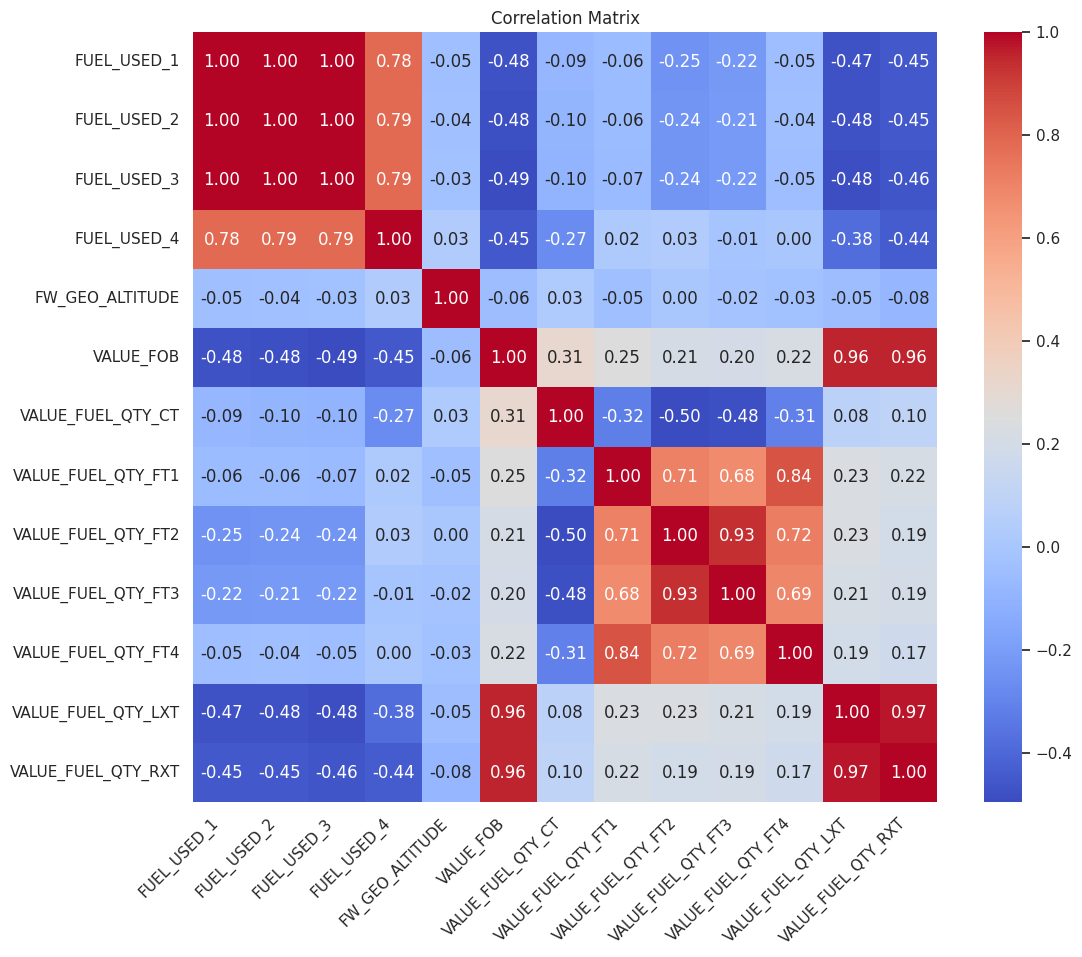

In [ ]:
selected_features = ['UTC_TIME', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
                     'FW_GEO_ALTITUDE', 'VALUE_FOB', 'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1',
                     'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4',
                     'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT'
                     ]
corr_matrix(df, selected_features)

Defining a list of selected features named selected_features. These features are intended for analysis in a correlation matrix generated by the corr_matrix function.

# **2. Feature Engineering**

## **2.1. msn_02 filtering**

In [ ]:
csv_02 = '/content/drive/My Drive/Colab Notebooks/Capstone/msn_02_fuel_leak_signals_preprocessed.csv'
msn_02 = pd.read_csv(csv_02, delimiter=';')

In [ ]:
filtered2_msn_02 = msn_02.loc[:, ['UTC_TIME', 'Flight', 'FLIGHT_PHASE_COUNT',
                                  'VALUE_FOB', 'FUEL_USED_1',
                                  'FUEL_USED_2', 'FUEL_USED_3','FUEL_USED_4',
                                  'FW_GEO_ALTITUDE', 'FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']]
filtered2_msn_02 = filtered2_msn_02[filtered2_msn_02['FLIGHT_PHASE_COUNT'] == 8]
filtered2_msn_02['UTC_TIME'] = pd.to_datetime(filtered2_msn_02['UTC_TIME'])

filtered2_msn_02['TOTAL_FUEL_USED'] = filtered2_msn_02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)
filtered2_msn_02.drop(columns=['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4'], inplace=True)
filtered2_msn_02.drop_duplicates(inplace=True)

filtered2_msn_02['SECONDS_PER_FLIGHT'] = (filtered2_msn_02['UTC_TIME'] - filtered2_msn_02.groupby('Flight')['UTC_TIME'].transform('first')).dt.total_seconds()
filtered2_msn_02 = filtered2_msn_02[filtered2_msn_02['VALUE_FOB'] != 0]

filtered2_msn_02['TOTAL_SECONDS_PER_FLIGHT'] = filtered2_msn_02.groupby('Flight')['UTC_TIME'].transform(lambda x: (x.max() - x.min()).total_seconds())

filtered2_msn_02['VALUE_FOB_DIFF'] = filtered2_msn_02.groupby('Flight')['VALUE_FOB'].diff(periods=1)
filtered2_msn_02['VALUE_FOB_DIFF'] = np.multiply(filtered2_msn_02['VALUE_FOB_DIFF'], -1)
filtered2_msn_02['VALUE_FOB_DIFF'] = filtered2_msn_02['VALUE_FOB_DIFF'].fillna(0)

filtered2_msn_02['TOTAL_FUEL_USED_DIFF'] = filtered2_msn_02.groupby('Flight')['TOTAL_FUEL_USED'].diff(periods=1)
filtered2_msn_02['TOTAL_FUEL_USED_DIFF'].fillna(0, inplace=True)

filtered2_msn_02 = filtered2_msn_02[filtered2_msn_02['TOTAL_SECONDS_PER_FLIGHT'] >= 3600]
filtered2_msn_02.reset_index(drop=True, inplace=True)

<ipython-input-4-d40e5f76f491>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2_msn_02['TOTAL_SECONDS_PER_FLIGHT'] = filtered2_msn_02.groupby('Flight')['UTC_TIME'].transform(lambda x: (x.max() - x.min()).total_seconds())
<ipython-input-4-d40e5f76f491>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2_msn_02['VALUE_FOB_DIFF'] = filtered2_msn_02.groupby('Flight')['VALUE_FOB'].diff(periods=1)
<ipython-input-4-d40e5f76f491>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [ ]:
filtered2_msn_02.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/filtered2_msn_02.csv', index=False)

## **2.2. Feature Enhancement**

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/filtered2_msn_02.csv'
filtered2_msn_02 = pd.read_csv(file_path)

Reading the CSV file into a DataFrame

In [ ]:
filtered2_msn_02['FUEL_FLOW_AVE'] = filtered2_msn_02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].mean(axis=1)
filtered2_msn_02.drop(columns=['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4'], inplace=True)

Consolidates fuel flow information by calculating the average from multiple columns and drops the redundant individual columns, simplifying the DataFrame.

In [ ]:
filtered2_msn_02 = filtered2_msn_02[filtered2_msn_02['TOTAL_SECONDS_PER_FLIGHT'] >= 1800]
filtered2_msn_02.reset_index(drop=True, inplace=True)

Filters the DataFrame filtered2_msn_02 to include only flights with a total duration of 30 minutes or more. Resets the index of the DataFrame for better indexing and continuity.

In [ ]:
filtered2_msn_02.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175


Displaying the first few rows of the filtered2_msn_02 DataFrame

In [ ]:
filtered2_msn_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378554 entries, 0 to 378553
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UTC_TIME                  378554 non-null  object 
 1   Flight                    378554 non-null  object 
 2   FLIGHT_PHASE_COUNT        378554 non-null  float64
 3   VALUE_FOB                 378554 non-null  float64
 4   FW_GEO_ALTITUDE           378554 non-null  float64
 5   TOTAL_FUEL_USED           378554 non-null  float64
 6   SECONDS_PER_FLIGHT        378554 non-null  float64
 7   TOTAL_SECONDS_PER_FLIGHT  378554 non-null  float64
 8   VALUE_FOB_DIFF            378554 non-null  float64
 9   TOTAL_FUEL_USED_DIFF      378554 non-null  float64
 10  FUEL_FLOW_AVE             378554 non-null  float64
dtypes: float64(9), object(2)
memory usage: 31.8+ MB


Providing information about the structure and data types of the filtered2_msn_02 DataFrame

In [ ]:
missing_values = filtered2_msn_02[['FUEL_FLOW_AVE', 'VALUE_FOB', 'FW_GEO_ALTITUDE', 'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT', 'VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF']].isnull().sum()
print(missing_values)

FUEL_FLOW_AVE               0
VALUE_FOB                   0
FW_GEO_ALTITUDE             0
TOTAL_FUEL_USED             0
SECONDS_PER_FLIGHT          0
TOTAL_SECONDS_PER_FLIGHT    0
VALUE_FOB_DIFF              0
TOTAL_FUEL_USED_DIFF        0
dtype: int64


Calculating and printing the number of missing values in specific columns of filtered2_msn_02 DataFrame

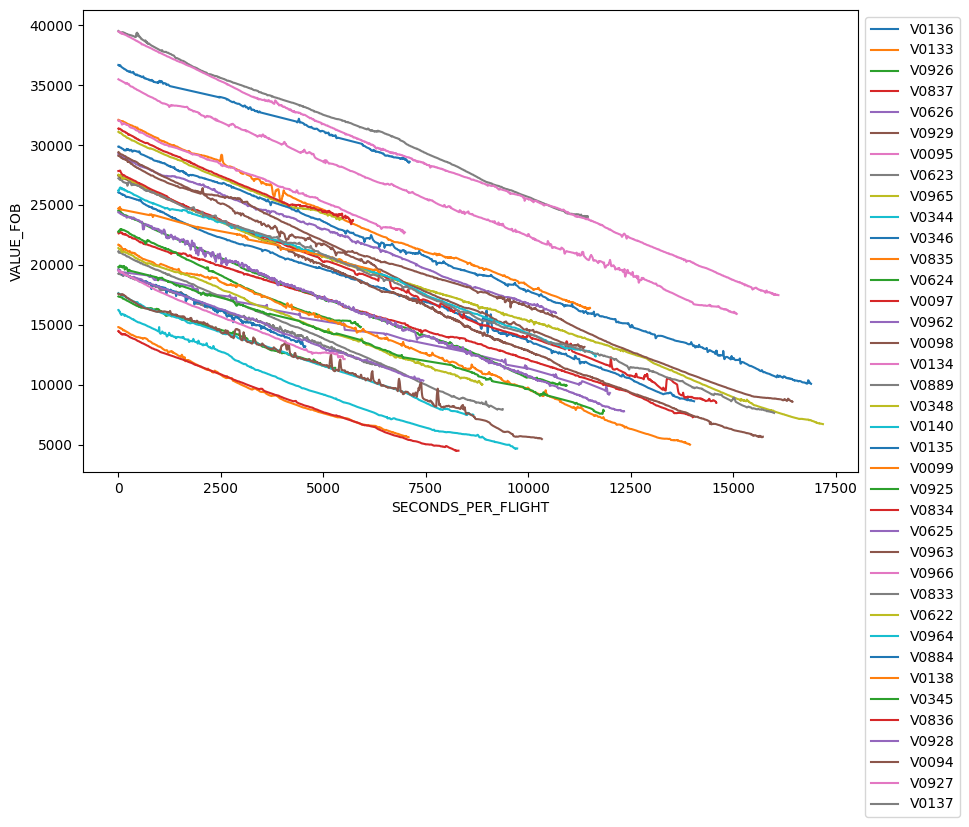

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
flights2 = filtered2_msn_02['Flight'].unique()
for flight2 in flights2:
    flight2_data = filtered2_msn_02[filtered2_msn_02['Flight'] == flight2]
    plt.plot(flight2_data['SECONDS_PER_FLIGHT'], flight2_data['VALUE_FOB'], label=flight2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.show()

Plotting the relationship between SECONDS_PER_FLIGHT and VALUE_FOB for each unique flight in filtered2_msn_02

In [ ]:
unique_flights2 = filtered2_msn_02['Flight'].nunique()
print(f"The number of unique flights in filtered2_msn_02 is: {unique_flights2}")

The number of unique flights in filtered2_msn_02 is: 38


Counting the number of unique flights in filtered2_msn_02

In [ ]:
filtered2_msn_02.shape

(378554, 11)

Displaying the shape (number of rows and columns) of the filtered2_msn_02 DataFrame

In [ ]:
filtered2_msn_02.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/filtered2_msn_02.csv', index=False)

Saving the filtered2_msn_02 DataFrame to a CSV file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounting Google Drive in a Colab environment

In [ ]:
csv_02 = '/content/drive/My Drive/Colab Notebooks/Capstone/filtered2_msn_02.csv'
filtered2_msn_02 = pd.read_csv(csv_02, delimiter=',')

Reading a CSV file into a Pandas DataFrame

In [ ]:
filtered2_msn_02.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175


Displaying the first few rows of the DataFrame

In [ ]:
filtered2_msn_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378554 entries, 0 to 378553
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UTC_TIME                  378554 non-null  object 
 1   Flight                    378554 non-null  object 
 2   FLIGHT_PHASE_COUNT        378554 non-null  float64
 3   VALUE_FOB                 378554 non-null  float64
 4   FW_GEO_ALTITUDE           378554 non-null  float64
 5   TOTAL_FUEL_USED           378554 non-null  float64
 6   SECONDS_PER_FLIGHT        378554 non-null  float64
 7   TOTAL_SECONDS_PER_FLIGHT  378554 non-null  float64
 8   VALUE_FOB_DIFF            378554 non-null  float64
 9   TOTAL_FUEL_USED_DIFF      378554 non-null  float64
 10  FUEL_FLOW_AVE             378554 non-null  float64
dtypes: float64(9), object(2)
memory usage: 31.8+ MB


Displaying information about the DataFrame

In [ ]:
pca_3_filtered_msn_02 = filtered2_msn_02.copy()

Creating a copy of the DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


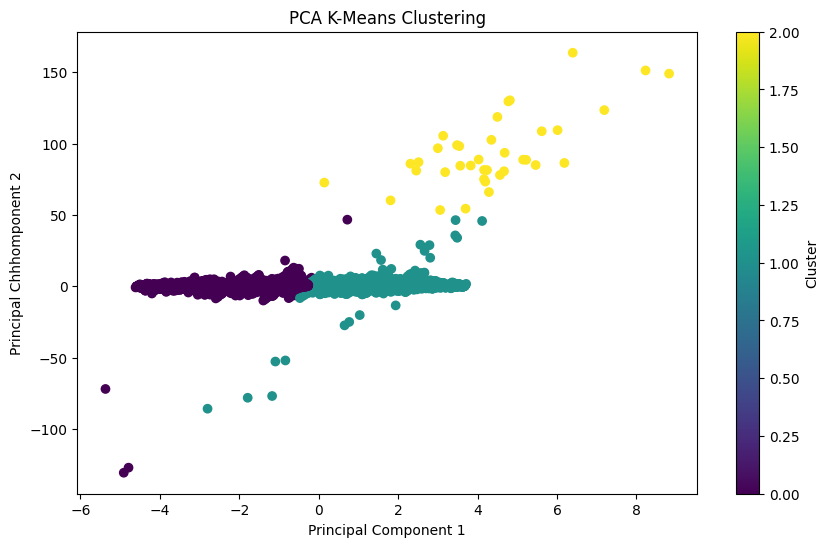

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
features = ['VALUE_FOB', 'FW_GEO_ALTITUDE', 'TOTAL_FUEL_USED','SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT', 'VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF', 'FUEL_FLOW_AVE']
X = pca_3_filtered_msn_02[features]
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)
pca_3_filtered_msn_02['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('PCA K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Chhhomponent 2')
plt.colorbar(label='Cluster')
plt.show()

Selects numerical features for PCA from the DataFrame pca_3_filtered_msn_02.
Standardizes the features using StandardScaler.
Applies PCA to reduce the dimensionality to 2 components.
Applies KMeans clustering with 3 clusters on the principal components.
Adds the cluster labels to the DataFrame.
Visualizes the clustering result on the first two principal components using a scatter plot with different colors for each cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


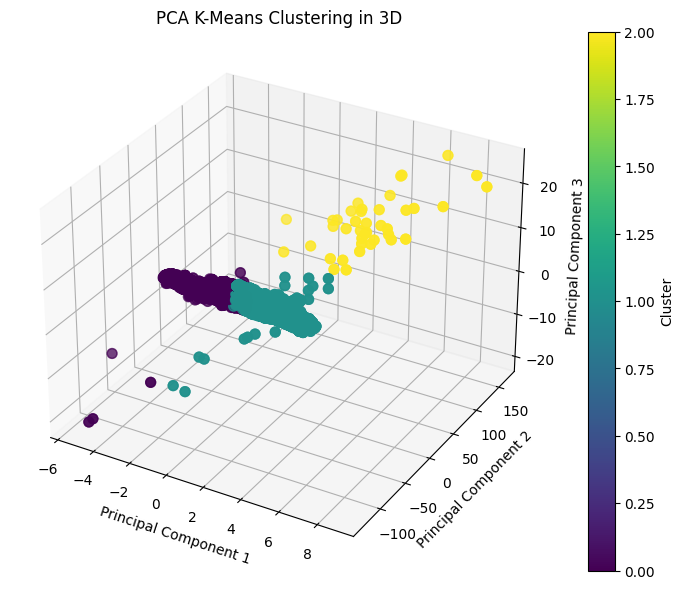

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
kmeans_3d = KMeans(n_clusters=3, random_state=42).fit(X_pca_3d)
filtered2_msn_02['Cluster_3D'] = kmeans_3d.labels_
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=kmeans_3d.labels_, cmap='viridis', s=50)
ax.set_title('PCA K-Means Clustering in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=kmeans_3d.labels_, cmap='viridis', s=50), label='Cluster')
plt.show()

Applies PCA with 3 components to the standardized features for 3D visualization.
Applies KMeans clustering with 3 clusters in 3D.
Adds the 3D cluster labels to the DataFrame.
Creates a 3D scatter plot to visualize the data points in the first three principal components with different colors for each cluster.

In [ ]:
pca_3_filtered_msn_02['Cluster'].value_counts()

1    227964
0    150553
2        37
Name: Cluster, dtype: int64

Displays the count of data points in each cluster after applying KMeans clustering with 2 components in PCA to the filtered dataset (pca_3_filtered_msn_02).

In [ ]:
average_df = pca_3_filtered_msn_02.groupby('Cluster')[['VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF','FW_GEO_ALTITUDE', 'SECONDS_PER_FLIGHT', 'FUEL_FLOW_AVE']].mean().reset_index()
average_df

,Cluster,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FW_GEO_ALTITUDE,SECONDS_PER_FLIGHT,FUEL_FLOW_AVE
0,0,1.150419,1.116062,13637.016272,10199.758497,1026.481690
1,1,1.360004,1.338602,16274.560508,3293.274565,1216.684800
2,2,458.513514,654.962435,3377.791243,5505.000000,1521.488506


Computes the mean values of selected numerical features for each cluster in the dataset pca_3_filtered_msn_02 after applying KMeans clustering with 2 components in PCA.

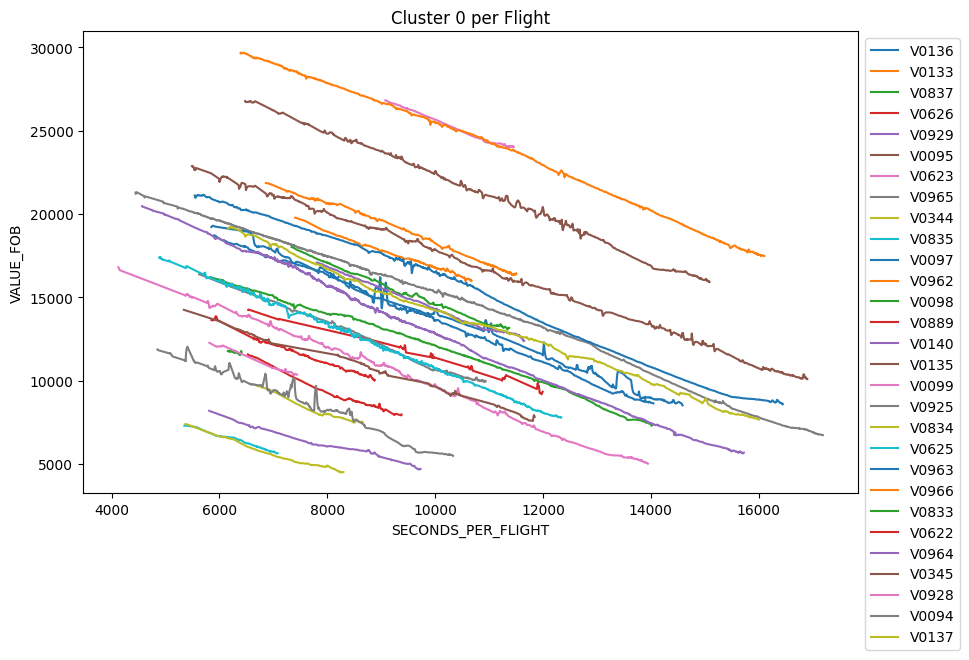

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cluster_0_data = pca_3_filtered_msn_02[pca_3_filtered_msn_02['Cluster'] == 0]
flights_cluster_0 = cluster_0_data['Flight'].unique()
for flight in flights_cluster_0:
    flight_data_cluster_0 = cluster_0_data[cluster_0_data['Flight'] == flight]
    plt.plot(flight_data_cluster_0['SECONDS_PER_FLIGHT'], flight_data_cluster_0['VALUE_FOB'], label=flight)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.title('Cluster 0 per Flight')
plt.show()

Selects data points in pca_3_filtered_msn_02 belonging to Cluster 0.
Extracts unique flight numbers from Cluster 0.
Plots 'VALUE_FOB' against 'SECONDS_PER_FLIGHT' for each flight in Cluster 0 with individual lines and labels for each flight.

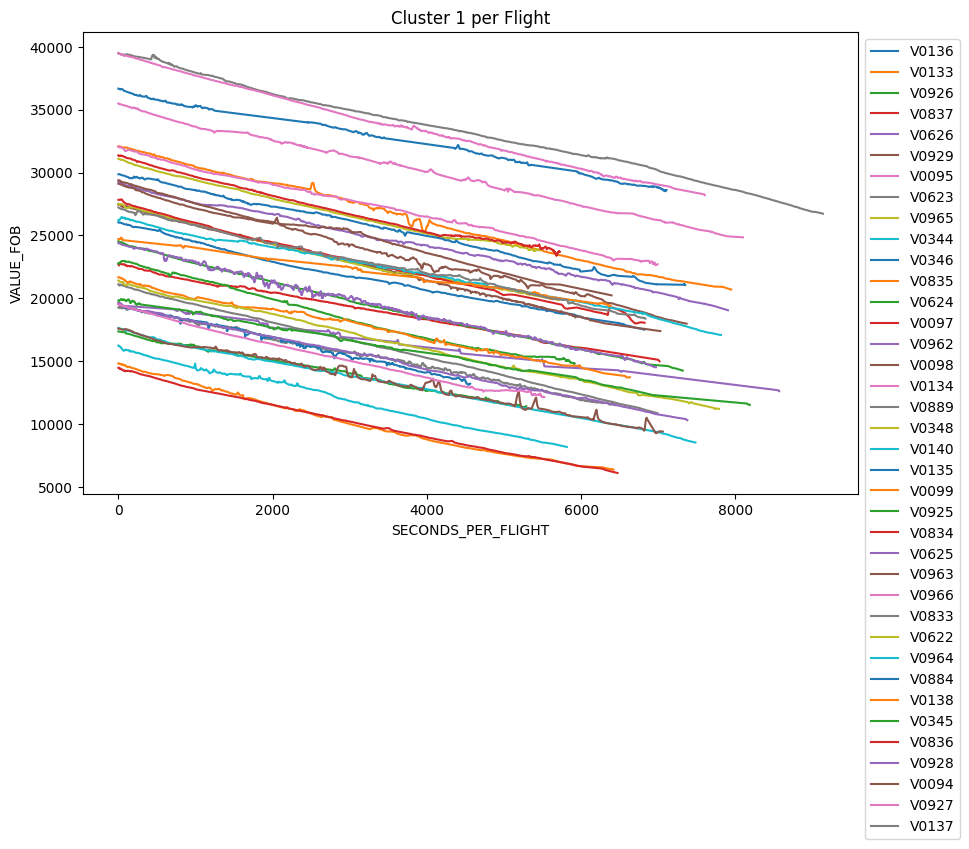

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cluster_1_data = pca_3_filtered_msn_02[pca_3_filtered_msn_02['Cluster'] == 1]
flights_cluster_1 = cluster_1_data['Flight'].unique()
for flight in flights_cluster_1:
    flight_data_cluster_1 = cluster_1_data[cluster_1_data['Flight'] == flight]
    plt.plot(flight_data_cluster_1['SECONDS_PER_FLIGHT'], flight_data_cluster_1['VALUE_FOB'], label=flight)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.title('Cluster 1 per Flight')
plt.show()

Selects data points in pca_3_filtered_msn_02 belonging to Cluster 1.
Extracts unique flight numbers from Cluster 1.
Plots 'VALUE_FOB' against 'SECONDS_PER_FLIGHT' for each flight in Cluster 1 with individual lines and labels for each flight.

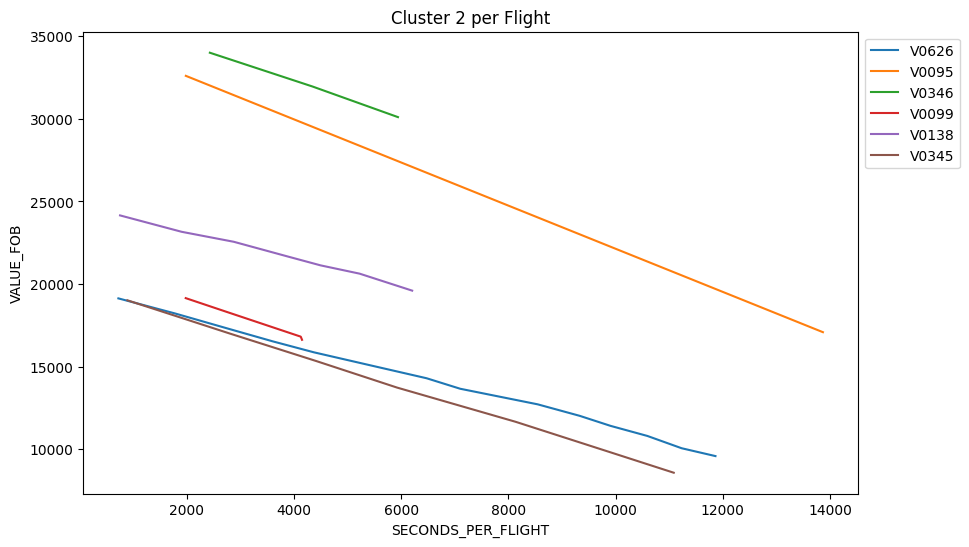

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cluster_2_data = pca_3_filtered_msn_02[pca_3_filtered_msn_02['Cluster'] == 2]
flights_cluster_2 = cluster_2_data['Flight'].unique()
for flight in flights_cluster_2:
    flight_data_cluster_2 = cluster_2_data[cluster_2_data['Flight'] == flight]
    plt.plot(flight_data_cluster_2['SECONDS_PER_FLIGHT'], flight_data_cluster_2['VALUE_FOB'], label=flight)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.title('Cluster 2 per Flight')
plt.show()

Selects data points in pca_3_filtered_msn_02 belonging to Cluster 2.
Extracts unique flight numbers from Cluster 2.
Plots 'VALUE_FOB' against 'SECONDS_PER_FLIGHT' for each flight in Cluster 2 with individual lines and labels for each flight.

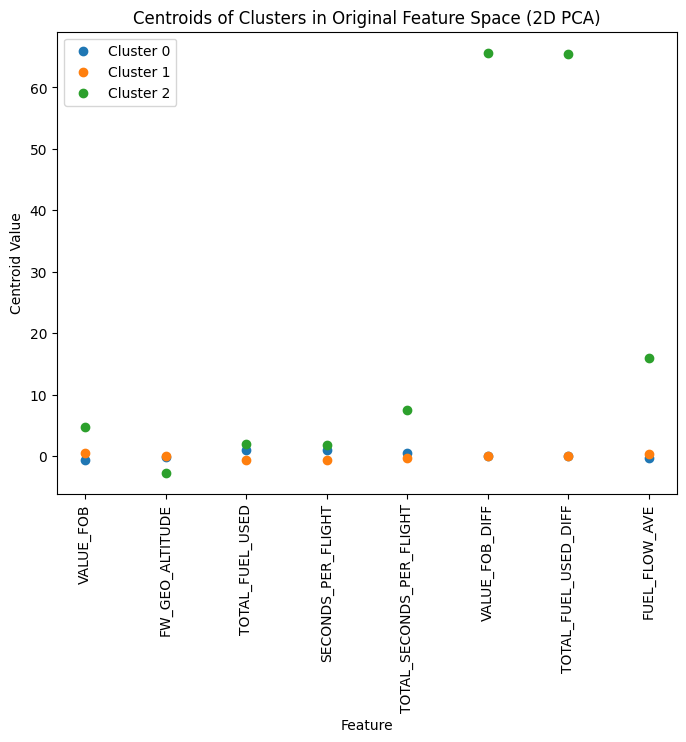

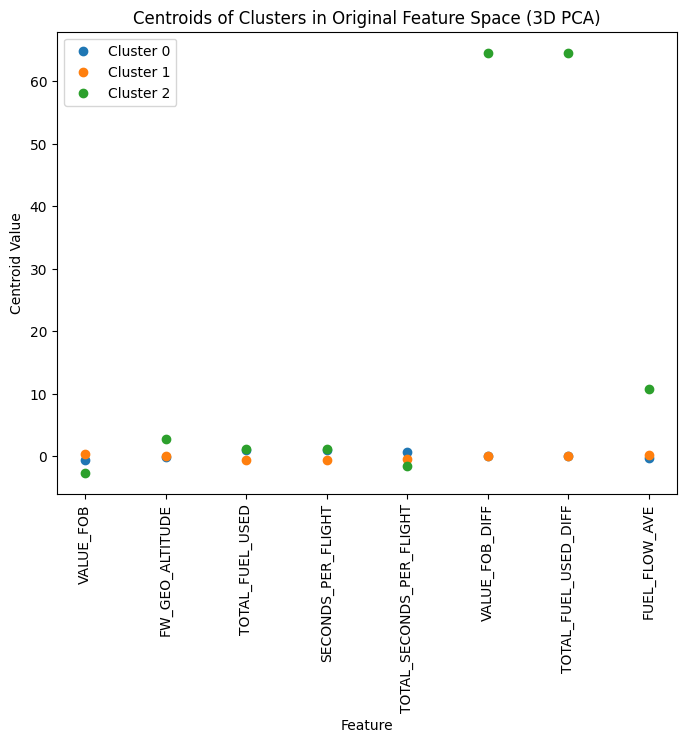

In [ ]:
centroids_pca_2d = kmeans.cluster_centers_
centroids_original_2d = pca.inverse_transform(centroids_pca_2d)
centroids_pca_3d = kmeans_3d.cluster_centers_
centroids_original_3d = pca_3d.inverse_transform(centroids_pca_3d)
features = ['VALUE_FOB', 'FW_GEO_ALTITUDE', 'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT', 'VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF', 'FUEL_FLOW_AVE']
plt.figure(figsize=(8, 6))
for i, centroid in enumerate(centroids_original_2d):
    plt.scatter(range(len(centroid)), centroid, label=f'Cluster {i}')
plt.xticks(range(len(features)), features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Centroid Value')
plt.title('Centroids of Clusters in Original Feature Space (2D PCA)')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
for i, centroid in enumerate(centroids_original_3d):
    plt.scatter(range(len(centroid)), centroid, label=f'Cluster {i}')
plt.xticks(range(len(features)), features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Centroid Value')
plt.title('Centroids of Clusters in Original Feature Space (3D PCA)')
plt.legend()
plt.show()

Computes and extracts centroids for both 2D and 3D PCA.
Inverts the transformation to bring centroids back to the original feature space.
Plots the centroids in the original feature space for each cluster, showing the distribution of feature values.
Separate plots are provided for 2D and 3D PCA results.

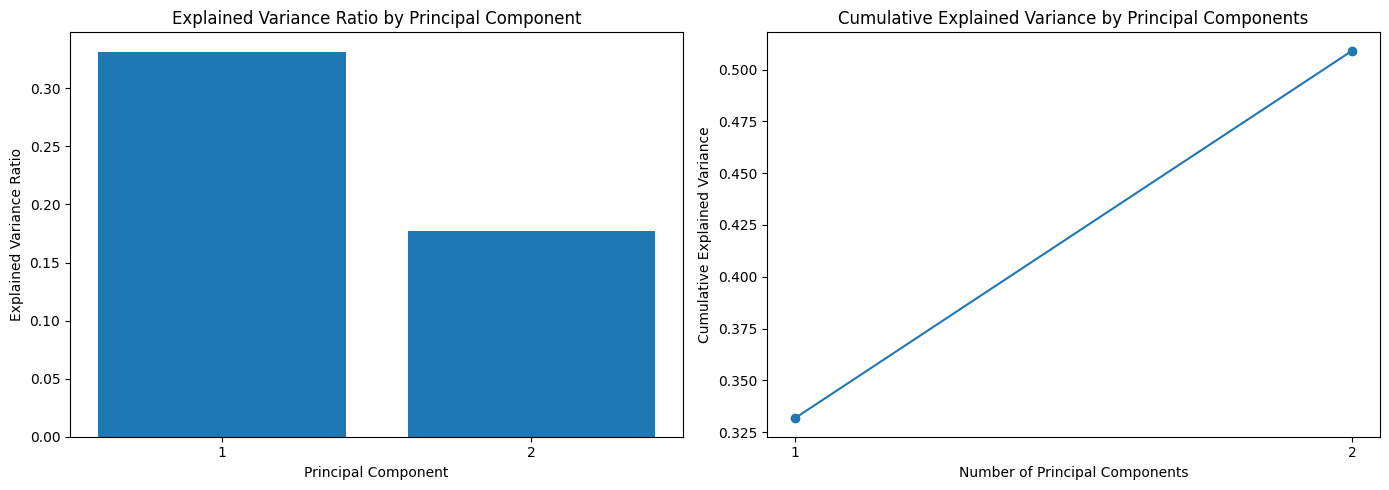

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance Ratio by Principal Component')
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance by Principal Components')
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

Computes and plots the explained variance ratio for each principal component.
Plots the cumulative explained variance with the number of principal components.
The first plot shows the contribution of each principal component to the total variance.
The second plot illustrates the cumulative explained variance, indicating the portion of total variance captured by a given number of principal components.

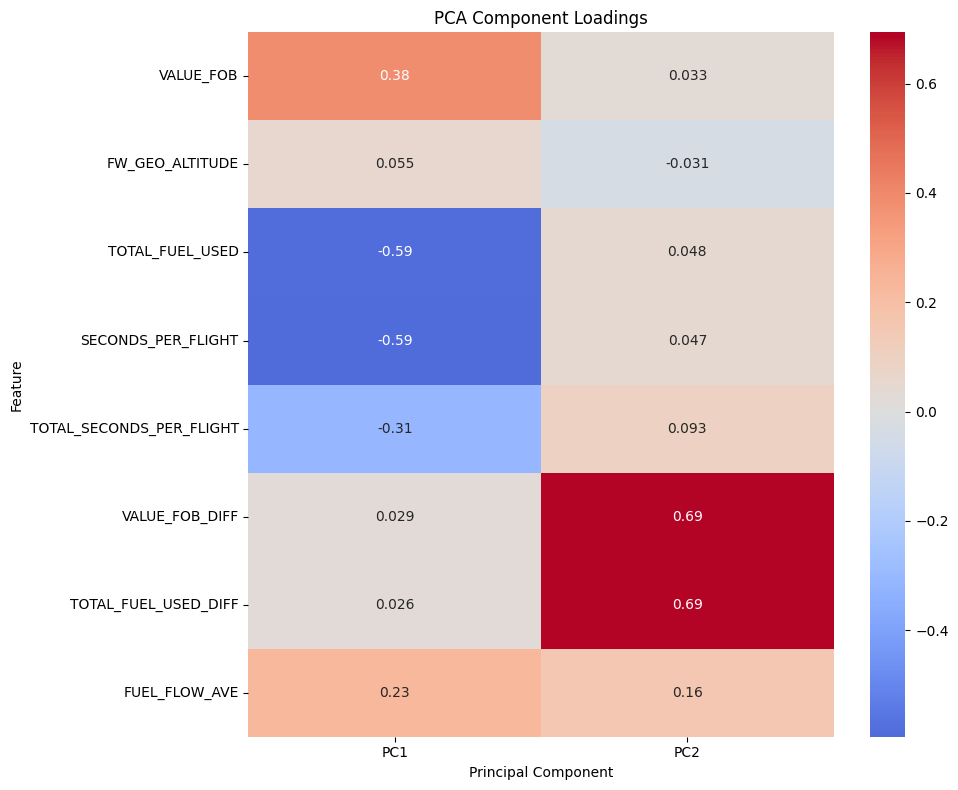

In [ ]:
import seaborn as sns
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=features, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
plt.figure(figsize=(10, len(features)))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Computes and visualizes the loadings of each feature on each principal component in a heatmap.
Loadings represent the correlation between the original features and the principal components.
The heatmap helps interpret the contribution of each feature to the principal components.
Positive and negative values indicate the direction and strength of the correlation.

In [ ]:
cluster_0_data.describe()

,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster
count,150553.0,150553.000000,150553.000000,150553.000000,150553.000000,150553.000000,150553.000000,150553.000000,150553.000000,150553.0
mean,8.0,13985.294063,13637.016272,13775.897961,10199.758497,13997.377648,1.150419,1.116062,1026.481690,0.0
std,0.0,5186.139271,9477.428465,3518.941889,2668.789527,2617.890592,5.074268,6.778426,377.307726,0.0
min,8.0,4493.000000,-372.102700,3380.603000,4127.000000,6440.000000,-139.000000,-1720.559000,190.022275,0.0
25%,8.0,10076.000000,5019.312000,11006.820000,8085.000000,11650.000000,0.000000,0.944000,856.230400,0.0
50%,8.0,13461.000000,10941.750000,13352.633000,9835.000000,14590.000000,1.000000,1.154000,1040.611250,0.0
75%,8.0,17326.000000,20318.630000,16135.956000,12066.000000,16106.000000,3.000000,1.419000,1278.904750,0.0
max,8.0,29689.000000,36496.800000,22478.552000,17192.000000,17192.000000,307.000000,255.590000,2161.517250,0.0


Display summary statistics for Cluster 0

In [ ]:
cluster_1_data.describe()

,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster
count,227964.0,227964.000000,227964.000000,227964.000000,227964.000000,227964.000000,227964.000000,227964.000000,227964.000000,227964.0
mean,8.0,21206.055768,16274.560508,5127.805117,3293.274565,10808.218078,1.360004,1.338602,1216.684800,1.0
std,0.0,6804.744955,10579.758695,2601.278844,1984.042432,3687.758305,4.634459,4.801482,352.651931,0.0
min,8.0,6120.000000,-147.082700,329.657980,0.000000,4560.000000,-171.000000,-1123.107000,200.154650,1.0
25%,8.0,15958.000000,6553.622500,2999.606725,1605.750000,7441.000000,-0.000000,1.123000,1010.622150,1.0
50%,8.0,20850.000000,15366.755000,5061.084500,3219.000000,10939.000000,1.000000,1.363000,1226.864000,1.0
75%,8.0,25883.000000,25746.172500,7106.471500,4851.000000,14037.000000,3.000000,1.626800,1466.419750,1.0
max,8.0,39504.000000,35485.620000,13324.095000,9134.000000,17192.000000,352.000000,371.366400,2142.812250,1.0


Display summary statistics for Cluster 1

In [ ]:
from scipy import stats
z_scores = stats.zscore(cluster_1_data['VALUE_FOB_DIFF'])
threshold = 3
cluster_1_data = cluster_1_data[(z_scores < threshold) & (z_scores > -threshold)]

Computes Z-scores for the 'VALUE_FOB_DIFF' column in Cluster 1 data to identify outliers.
Establishes a threshold (e.g., 3 standard deviations) to determine outliers.
Filters out data points where the Z-scores fall outside the specified threshold.
This process helps remove extreme values and focuses on data within a reasonable range for analysis.

In [ ]:
z_scores = stats.zscore(cluster_1_data['TOTAL_FUEL_USED_DIFF'])
threshold = 3
cluster_1_data = cluster_1_data[(z_scores < threshold) & (z_scores > -threshold)]

Computes Z-scores for the 'TOTAL_FUEL_USED_DIFF' column in Cluster 1 data to identify outliers.
Establishes a threshold (e.g., 3 standard deviations) to determine outliers.
Filters out data points where the Z-scores fall outside the specified threshold.
This process helps remove extreme values and focuses on data within a reasonable range for analysis.

In [ ]:
z_scores = stats.zscore(cluster_1_data['FW_GEO_ALTITUDE'])
threshold = 3
cluster_1_data = cluster_1_data[(z_scores < threshold) & (z_scores > -threshold)]

Computes Z-scores for the 'FW_GEO_ALTITUDE' column in Cluster 1 data to identify outliers.
Establishes a threshold (e.g., 3 standard deviations) to determine outliers.
Filters out data points where the Z-scores fall outside the specified threshold.
This step aims to remove extreme values from the 'FW_GEO_ALTITUDE' column in Cluster 1 data for further analysis.

In [ ]:
cluster_1_data.describe()

,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster
count,224074.0,224074.000000,224074.000000,224074.000000,224074.000000,224074.00000,224074.000000,224074.000000,224074.000000,224074.0
mean,8.0,21236.791805,16432.816758,5132.646608,3295.137249,10816.85042,1.305404,1.352821,1217.948435,1.0
std,0.0,6824.547255,10566.392447,2606.039410,1987.769885,3692.65794,3.090914,0.390761,350.097895,0.0
min,8.0,6120.000000,-147.082700,329.657980,0.000000,4560.00000,-12.000000,0.000000,204.508500,1.0
25%,8.0,15971.000000,6565.271500,2996.927475,1599.000000,7441.00000,0.000000,1.125500,1012.854094,1.0
50%,8.0,20896.000000,15754.755000,5067.092500,3221.000000,10939.00000,1.000000,1.364000,1227.607125,1.0
75%,8.0,25942.000000,25800.630000,7117.313250,4857.000000,14048.00000,3.000000,1.625000,1465.326000,1.0
max,8.0,39504.000000,35485.620000,13324.095000,9134.000000,17192.00000,15.000000,9.049000,2142.812250,1.0


Display descriptive statistics for Cluster 1 data after Z-score filtering

In [ ]:
cluster_1_data.shape

(224074, 12)

Display the shape of the filtered Cluster 1 data

In [ ]:
cluster_1_data = cluster_1_data[cluster_1_data['FW_GEO_ALTITUDE'] >= 0]
cluster_1_data.shape

(224062, 12)

Display the shape of the filtered Cluster 1 data after additional filtering based on FW_GEO_ALTITUDE

In [ ]:
cluster_1_data.describe()

,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster
count,224062.0,224062.000000,224062.000000,224062.000000,224062.000000,224062.00000,224062.000000,224062.000000,224062.000000,224062.0
mean,8.0,21236.511832,16433.700820,5132.741001,3295.196196,10816.85791,1.305313,1.352840,1217.965811,1.0
std,0.0,6824.622768,10565.984794,2606.077274,1987.806793,3692.75668,3.090890,0.390763,350.098924,0.0
min,8.0,6120.000000,11.165100,329.657980,0.000000,4560.00000,-12.000000,0.000000,204.508500,1.0
25%,8.0,15971.000000,6565.364750,2996.882500,1599.000000,7441.00000,0.000000,1.125600,1012.904463,1.0
50%,8.0,20896.000000,15756.585000,5067.422500,3221.000000,10939.00000,1.000000,1.364000,1227.646250,1.0
75%,8.0,25941.000000,25800.630000,7117.521000,4857.000000,14048.00000,3.000000,1.625000,1465.334938,1.0
max,8.0,39504.000000,35485.620000,13324.095000,9134.000000,17192.00000,15.000000,9.049000,2142.812250,1.0


Display summary statistics for the filtered Cluster 1 data

In [ ]:
cluster_1_data

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075,1
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075,1
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475,1
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875,1
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175,1
...,...,...,...,...,...,...,...,...,...,...,...,...
369375,2011-03-10 14:44:03,V0137,8.0,18401.0,13084.130,9762.1010,6824.0,16002.0,2.0,1.8300,1662.75375,1
369377,2011-03-10 14:44:05,V0137,8.0,18403.0,13140.380,9765.7020,6826.0,16002.0,1.0,1.7740,1662.64700,1
369378,2011-03-10 14:44:06,V0137,8.0,18400.0,13168.630,9767.6410,6827.0,16002.0,3.0,1.9390,1662.62850,1
369380,2011-03-10 14:44:08,V0137,8.0,18398.0,13225.130,9771.4090,6829.0,16002.0,1.0,1.8850,1662.63700,1


Display the filtered Cluster 1 data

In [ ]:
window_size = 500
cluster_1_data['VALUE_FOB_SMOOTHED'] = cluster_1_data.groupby('Flight')['VALUE_FOB'].transform(lambda x: x.rolling(window=window_size).mean())
cluster_1_data.reset_index(drop=True, inplace=True)
cluster_1_data

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster,VALUE_FOB_SMOOTHED
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075,1,NaN
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075,1,NaN
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475,1,NaN
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875,1,NaN
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224057,2011-03-10 14:44:03,V0137,8.0,18401.0,13084.130,9762.1010,6824.0,16002.0,2.0,1.8300,1662.75375,1,19033.806
224058,2011-03-10 14:44:05,V0137,8.0,18403.0,13140.380,9765.7020,6826.0,16002.0,1.0,1.7740,1662.64700,1,19031.418
224059,2011-03-10 14:44:06,V0137,8.0,18400.0,13168.630,9767.6410,6827.0,16002.0,3.0,1.9390,1662.62850,1,19029.026
224060,2011-03-10 14:44:08,V0137,8.0,18398.0,13225.130,9771.4090,6829.0,16002.0,1.0,1.8850,1662.63700,1,19026.642


Generates a smoothed version of the 'VALUE_FOB' column for Cluster 1 by applying a rolling window mean with a specified window size (500).
The rolling window mean is calculated separately for each flight in the dataset.
The resulting DataFrame is displayed, now including the new 'VALUE_FOB_SMOOTHED' column.

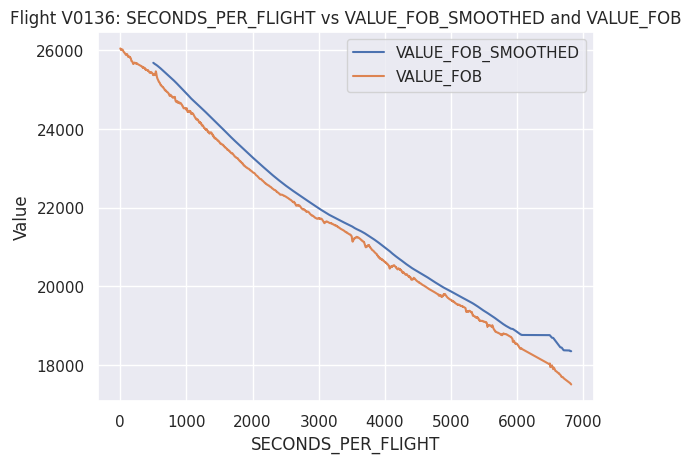

In [ ]:
import matplotlib.pyplot as plt
flight_v0136 = cluster_1_data[cluster_1_data['Flight'] == 'V0136']
x = flight_v0136['SECONDS_PER_FLIGHT']
y1 = flight_v0136['VALUE_FOB_SMOOTHED']
y2 = flight_v0136['VALUE_FOB']
plt.plot(x, y1, label='VALUE_FOB_SMOOTHED')
plt.plot(x, y2, label='VALUE_FOB')
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('Value')
plt.title('Flight V0136: SECONDS_PER_FLIGHT vs VALUE_FOB_SMOOTHED and VALUE_FOB')
plt.legend()
plt.show()

Plots the smoothed ('VALUE_FOB_SMOOTHED') and original ('VALUE_FOB') values against 'SECONDS_PER_FLIGHT' for a specific flight (V0136) in Cluster 1.
Provides a visual representation of the smoothed trend compared to the original values over the flight duration.

In [ ]:
cluster_1_data['VALUE_FOB_SMOOTHED_DIFF'] = cluster_1_data.groupby('Flight')['VALUE_FOB_SMOOTHED'].diff(periods=1)
cluster_1_data['VALUE_FOB_SMOOTHED_DIFF'] = np.multiply(cluster_1_data['VALUE_FOB_SMOOTHED_DIFF'], -1)
cluster_1_data['VALUE_FOB_SMOOTHED_DIFF'] = cluster_1_data['VALUE_FOB_SMOOTHED_DIFF'].fillna(0)

Calculating and processing the differentiated smoothed 'VALUE_FOB' for Cluster 1

In [ ]:
cluster_1_data['cumsum_VALUE_FOB_SMOOTHED_DIFF'] = cluster_1_data.groupby('Flight')['VALUE_FOB_SMOOTHED_DIFF'].cumsum()

Calculating the cumulative sum of the differentiated smoothed 'VALUE_FOB' for Cluster 1

In [ ]:
cluster_1_data.describe()

,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF
count,224062.0,224062.000000,224062.000000,224062.000000,224062.000000,224062.00000,224062.000000,224062.000000,224062.000000,224062.0,205100.000000,224062.000000,224062.000000
mean,8.0,21236.511832,16433.700820,5132.741001,3295.196196,10816.85791,1.305313,1.352840,1217.965811,1.0,21269.644581,1.284538,3726.861719
std,0.0,6824.622768,10565.984794,2606.077274,1987.806793,3692.75668,3.090890,0.390763,350.098924,0.0,6764.519996,0.599882,2577.916702
min,8.0,6120.000000,11.165100,329.657980,0.000000,4560.00000,-12.000000,0.000000,204.508500,1.0,6602.450000,-1.038000,0.000000
25%,8.0,15971.000000,6565.364750,2996.882500,1599.000000,7441.00000,0.000000,1.125600,1012.904463,1.0,16008.121500,1.092000,1507.089500
50%,8.0,20896.000000,15756.585000,5067.422500,3221.000000,10939.00000,1.000000,1.364000,1227.646250,1.0,20959.174000,1.338000,3622.747000
75%,8.0,25941.000000,25800.630000,7117.521000,4857.000000,14048.00000,3.000000,1.625000,1465.334938,1.0,25910.877500,1.550000,5744.085500
max,8.0,39504.000000,35485.620000,13324.095000,9134.000000,17192.00000,15.000000,9.049000,2142.812250,1.0,39225.502000,11.204000,12073.272000


Displaying summary statistics for Cluster 1 data after transformations

In [ ]:
cluster_1_data_copy = cluster_1_data.copy()

Creating a copy of Cluster 1 data

In [ ]:
cluster_1_data.tail()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF
224057,2011-03-10 14:44:03,V0137,8.0,18401.0,13084.13,9762.101,6824.0,16002.0,2.0,1.830,1662.75375,1,19033.806,2.386,7792.964
224058,2011-03-10 14:44:05,V0137,8.0,18403.0,13140.38,9765.702,6826.0,16002.0,1.0,1.774,1662.64700,1,19031.418,2.388,7795.352
224059,2011-03-10 14:44:06,V0137,8.0,18400.0,13168.63,9767.641,6827.0,16002.0,3.0,1.939,1662.62850,1,19029.026,2.392,7797.744
224060,2011-03-10 14:44:08,V0137,8.0,18398.0,13225.13,9771.409,6829.0,16002.0,1.0,1.885,1662.63700,1,19026.642,2.384,7800.128
224061,2011-03-10 14:44:11,V0137,8.0,18393.0,13308.88,9776.889,6832.0,16002.0,3.0,1.883,1663.56750,1,19024.254,2.388,7802.516


Displaying the last few rows of Cluster 1 data

In [ ]:
cluster_1_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/MSN_02_cleaned.csv', index=False)

Save cluster_1_data to CSV